# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [X] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Daniela Molina
- Gabriel Beal
- Marc Isaia
- Haoxuan Cui

<a id='research_question'></a>
# Research Question

There are currently a substantial amount of teenagers and young adults (ages 14-28) who use the top social media applications in the United States. Taking that into consideration, does extensive usage (2+ hours/day?) of the aforementioned applications by these users generate an onset of symptoms that correspond to the clinical criteria of an Anxiety Disorder and/or Depressive Disorder?

<a id='background'></a>

## Background & Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

CSV from the Google Form Survey we conducted:
- Dataset Name: Social Media and Mental Health
- Link to the dataset: "Social Media and Mental Health.csv" in our Github Repo
- Number of Observations: 182
This dataset is the CSV file created from the responses received on our survey which collected data on social media use and mental health. It contains information about the individual’s identity, their social media usage (average time spent, which apps they use, when they first started using them), and their current mental health as well as whether they feel that it can be attributed to social media.

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Statmodels & patsy
import patsy
import statsmodels.api as sm
from scipy.stats import pearsonr, norm, ttest_ind

In [2]:
df = pd.read_csv("Social_Media_and_Mental_Health.csv")

# Data Cleaning

Describe your data cleaning steps here.

In [3]:
# Rename columns
df.columns = ['time', 'gender', 'age', 'use social media', 'hours per day', 'days per week', 'check morning', 'check night', 'app count', 'start using', 'impact', 'mental health issues', 'suicidal thoughts', 'SM contributed', 'feedback']

# Remove responses with age over 28
df = df[df['age'] <= 28]

# Change yes and no to true and false
df = df.replace({"Yes": True, "No": False})

# Drop time column - not relevant to the research
df.drop(columns=['time'], inplace = True)

# Clean up time used
df["hours per day"] = df["hours per day"].str.replace(" hours", "")
df = df.replace({"Once a week": "1", "2-3 times a week": "2-3", "3-5 times a week": "3-5", "I use it every day":"7"})

# Clean up gender
df = df.replace({'Non-binary ': 'Non-binary', "Don’t know yet": "Prefer not to say"})
df = df.replace({"Non-Binary ": "Non-binary", "Female- heads up this is worded ambiguously and people may interpret it as what gender they're attracted to": "Female"})

# Clean up suicidal thoughts
df = df.replace({"a few times but have never acted on it": True, "Maybe ": "Prefer not to say", "Thought about it but can’t do it": True, "Passive suicidal thoughts. This means I do not really plan to ever commite sucide but instead just think about it as a option. Then, I snapped out of it because my mood imrpoves.": True})
df['suicidal thoughts'].value_counts()

# Change strings to numbers
df['age'] = pd.to_numeric(df['age'])
df['impact'] = pd.to_numeric(df['impact'])

# Save feedback in separate dataframe
df_feedback = df
df = df.drop(columns=['feedback'])

In [7]:
# Function to check whether the individual has Depression
def checkDepression(string):
    if 'Depression' in string:
        return True
    else:
        return False

In [8]:
# Function to check whether the individual has Anxiety
def checkAnxiety(string):
    if 'Anxiety' in string:
        return True
    else:
        return False

In [9]:
# Create new columns for whether the individual has Depression/Anxiety
df['Depression'] = df['mental health issues'].apply(checkDepression)
df['Anxiety'] = df['mental health issues'].apply(checkAnxiety)

# Removing mental health issues due to the reduced scope of the question
df = df.drop(columns=['mental health issues'])

In [11]:
# Function to count how many social media apps they use (out of the options we gave)
def appCount(string):
    if 'None of the above' in string:
        return 0
    semicolons = string.count(';')
    return semicolons + 1

In [12]:
# Get app count per individual
df['app count'] = df['app count'].apply(appCount)

In [14]:
# Change hours per day to quantitative variable by taking average of range
def hoursToInt(string):
    if string in "0-1":
        return 0.5
    elif string == "1-2":
        return 1.5
    elif string == "2-3":
        return 2.5
    elif string == "3-4":
        return 3.5
    else:
        return 4.5

In [15]:
df['average hours'] = df['hours per day'].apply(hoursToInt)

In [16]:
df

gender  age  use social media hours per day days per week check morning  \
0    Female   22              True           2-3           3-5          True   
1    Female   22              True           1-2             7         False   
2    Female   21              True            4+             7          True   
3    Female   19              True            4+           3-5          True   
4    Female   21              True           2-3             7          True   
..      ...  ...               ...           ...           ...           ...   
177    Male   24              True           3-4             7          True   
178    Male   20              True           2-3             7          True   
179    Male   23              True           1-2             7          True   
180    Male   19              True           1-2           NaN         False   
181    Male   16              True           1-2             7          True   

    check night  app count        start using  impact suicidal thoughts  \
0         False          2      Middle School       6              True   
1          True          4        High School       7             False   
2          True          4  Elementary School       5             False   
3          True          4  Elementary School       3              True   
4          True          2        High School       4             False   
..          ...        ...                ...     ...               ...   
177        True          1      Middle School       4              True   
178        True          4        High School       5             False   
179       False          0        High School       3             False   
180        True          1        High School       5              True   
181        True          1      Middle School       5              True   

    SM contributed  Depression  Anxiety  average hours  
0            Maybe        True     True            2.5  
1            Maybe        True     True            1.5  
2             True        True    False            4.5  
3             True        True     True            4.5  
4             True       False    False            2.5  
..             ...         ...      ...            ...  
177          Maybe        True     True            3.5  
178          False       False    False            2.5  
179           True       False    False            1.5  
180          False       False    False            1.5  
181          Maybe       False    False            1.5  

[180 rows x 15 columns]

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

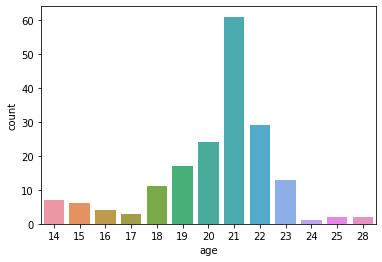

In [17]:
sns.countplot(x='age', data=df)

The graph above is a count of ages of respondents of our survey. We tried to target mainly young adults, since our research focuses on individuals who grew up or are growing up with social media applications.

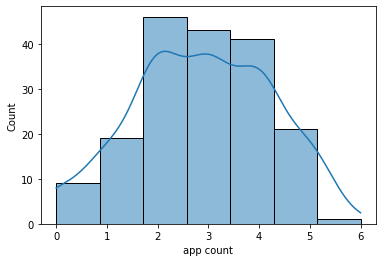

In [18]:
sns.histplot(df['app count'], bins=7, kde=True);

The majority of our respondents use between 2 to 4 social media applications regularly.

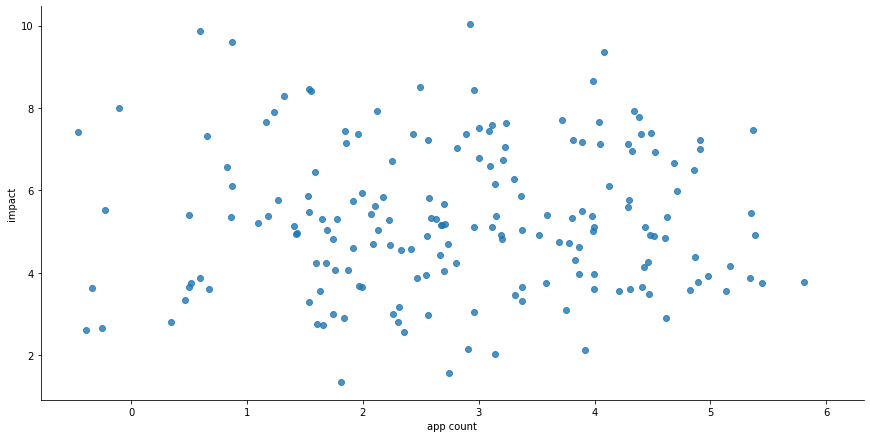

In [19]:
# jitter points to see relationship between quantitative variables
sns.lmplot(x='app count', y='impact', data=df, 
           fit_reg=False, height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);

In [20]:
x = df['app count']
y = df['impact']
np.corrcoef(x, y)

array([[ 1.        , -0.00387835],
       [-0.00387835,  1.        ]])

The pearson correlation of -0.0039 indicates that the amount of social media applications an individual uses has a miniscule negative correlation to the positive/negative impact of social media on their mental health. This is likely due to the amount of neutral (5) responses we received for impact.

In [21]:
outcome, predictors = patsy.dmatrices('y ~ x')
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                  0.002677
Date:                Wed, 03 Mar 2021   Prob (F-statistic):              0.959
Time:                        14:09:04   Log-Likelihood:                -353.51
No. Observations:                 180   AIC:                             711.0
Df Residuals:                     178   BIC:                             717.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3085      0.301     17.643      0.0

With a Beta 1 value of -.0049 this means that for every app count increase there is an expected -0.0049 increase in impact which means that for every app count increase (by 1 app) there is a very slight increase in the negative impact that it has on a users' mental health. The p' value of 0.959 means that we cannot reject the null hypothesis between app count and impact.

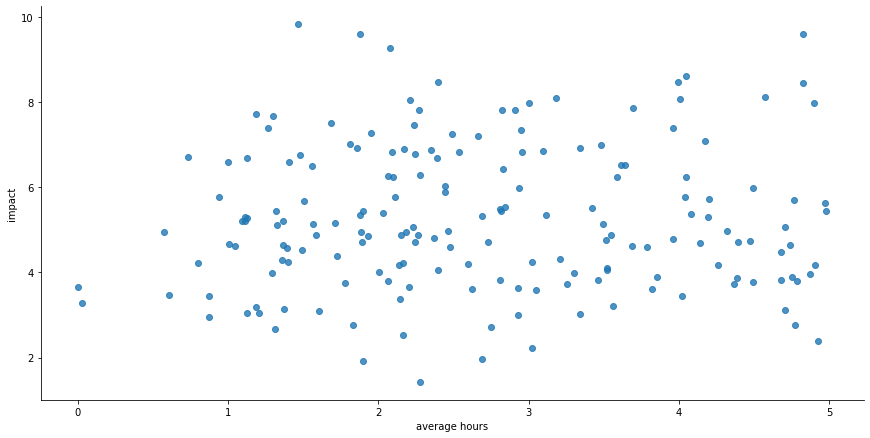

In [26]:
# jitter points to see relationship between quantitative variables
sns.lmplot(x='average hours', y='impact', data=df, 
           fit_reg=False, height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);

In [23]:
x = df['average hours']
y = df['impact']
np.corrcoef(x, y)

array([[1.        , 0.04304714],
       [0.04304714, 1.        ]])

In [24]:
outcome, predictors = patsy.dmatrices('y ~ x')
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3305
Date:                Wed, 03 Mar 2021   Prob (F-statistic):              0.566
Time:                        14:22:15   Log-Likelihood:                -353.35
No. Observations:                 180   AIC:                             710.7
Df Residuals:                     178   BIC:                             717.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1243      0.323     15.870      0.0

From the Beta 1 value we can see that a 1 unit increase in average hours leads to a .0627 unit increase in impact which means that in our data we gathered there is a small positive correlation between average hours spent on social media and a positive impact on mental health. However due to the high p-value of .566 there is not enough of a correlation to reject the null hypothesis once again. 

In [25]:
df.corr()

age  use social media  app count    impact  Depression  \
age               1.000000          0.102915   0.181497 -0.159554    0.159373   
use social media  0.102915          1.000000   0.157101 -0.073916    0.060324   
app count         0.181497          0.157101   1.000000 -0.003878    0.199259   
impact           -0.159554         -0.073916  -0.003878  1.000000   -0.078471   
Depression        0.159373          0.060324   0.199259 -0.078471    1.000000   
Anxiety           0.017655         -0.086446   0.137714 -0.115061    0.427984   
average hours    -0.076622          0.139682   0.214826  0.043047    0.163435   

                   Anxiety  average hours  
age               0.017655      -0.076622  
use social media -0.086446       0.139682  
app count         0.137714       0.214826  
impact           -0.115061       0.043047  
Depression        0.427984       0.163435  
Anxiety           1.000000       0.206367  
average hours     0.206367       1.000000

This table shows the Pearson corrleation values between each variable in our dataframe.

The r value of app count and Depression is 0.199259, which means that there is a slight positive correlation between these two. The higher the app count, the more likely an individual is to have Depression. Similarly, the r value for app count and Anxiety is 0.137714. Although this value is slightly lower, there is still a small positive correlation between these two. The highter the app count, the more likely an individual is to have Anxiety.

The r value of average hours and Depression is 0.163435, which again tells us that there is a positive correlation. Average hours and Anxiety follows the same correlation but is slightly higher at 0.206367. From these values, we can conclude that the more hours an individual uses social media on a daily basis, the more likely they are to have Depression and Anxiety.

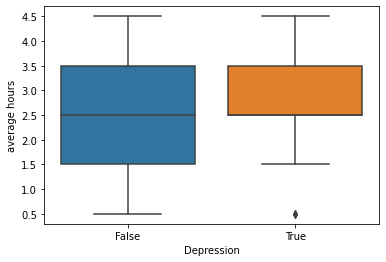

In [32]:
sns.boxplot(x='Depression', y='average hours', data=df)

In [50]:
df[df['Depression'] == True]['SM contributed'].value_counts()

Maybe    29
True     23
False    19
Name: SM contributed, dtype: int64

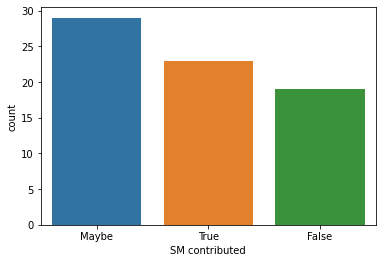

In [53]:
sns.countplot(x='SM contributed', data=df[df['Depression'] == True])

In [51]:
df[df['Anxiety'] == True]['SM contributed'].value_counts()

True     34
Maybe    27
False    16
Name: SM contributed, dtype: int64

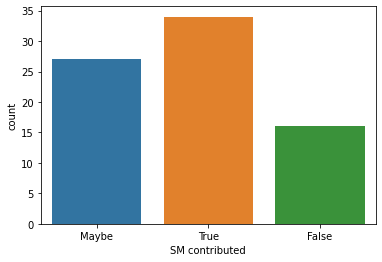

In [52]:
sns.countplot(x='SM contributed', data=df[df['Anxiety'] == True])

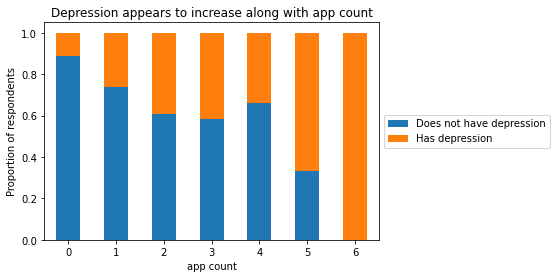

In [31]:
df2 = df.groupby([ 'Depression','app count'])['Depression'].count().unstack('app count').fillna(0)
sub_df2 = np.transpose(df2.div(df2.sum()))

# generate plot
ax = sub_df2.plot(kind='bar', stacked=True, rot=0,
                  title='Depression appears to increase along with app count')

# customize plot
ax.legend(('Does not have depression','Has depression'), loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("Proportion of respondents");

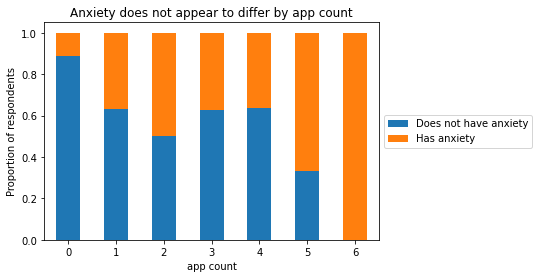

In [64]:
df2 = df.groupby([ 'Anxiety','app count'])['Anxiety'].count().unstack('app count').fillna(0)
sub_df2 = np.transpose(df2.div(df2.sum()))

# generate plot
ax = sub_df2.plot(kind='bar', stacked=True, rot=0,
                  title='Anxiety does not appear to differ by app count')

# customize plot
ax.legend(('Does not have anxiety','Has anxiety'), loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("Proportion of respondents");

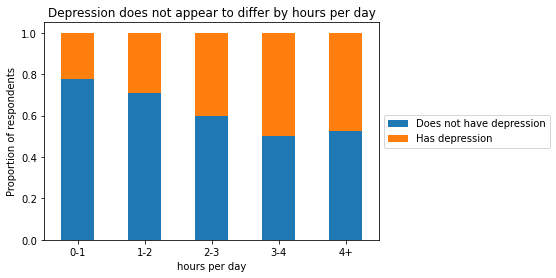

In [63]:
df2 = df.groupby([ 'Depression','hours per day'])['Depression'].count().unstack('hours per day').fillna(0)
sub_df2 = np.transpose(df2.div(df2.sum()))

# generate plot
ax = sub_df2.plot(kind='bar', stacked=True, rot=0,
                  title='Depression does not appear to differ by hours per day')

# customize plot
ax.legend(('Does not have depression','Has depression'), loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("Proportion of respondents");

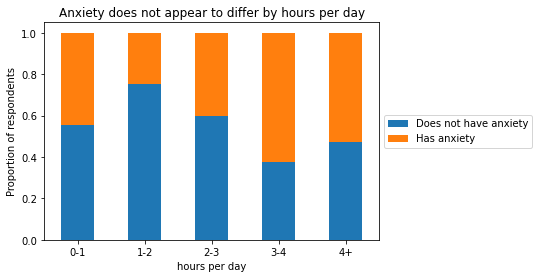

In [67]:
df2 = df.groupby([ 'Anxiety','hours per day'])['Anxiety'].count().unstack('hours per day').fillna(0)
sub_df2 = np.transpose(df2.div(df2.sum()))

# generate plot
ax = sub_df2.plot(kind='bar', stacked=True, rot=0,
                  title='Anxiety does not appear to differ much by hours per day')

# customize plot
ax.legend(('Does not have anxiety','Has anxiety'), loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("Proportion of respondents");

In [ ]:
# t-Test: compare means between variables (2 groups of same type)

In [ ]:
# Logistic regression

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*